In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import plotly.graph_objects as go
from datetime import datetime, timedelta

In [11]:
df = pd.read_csv("Skyserver_Rectangular8_11_2023 10_51_54 PM.csv",sep=",",header="infer")

In [12]:
df.shape

(500000, 18)

In [13]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961327743273,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6543777369295181824,GALAXY,0.634794,5812,56354,171
1,1237664879951151463,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,11760142036707334144,GALAXY,0.779136,10445,58158,427
2,1237660961330430096,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5152200256025548800,GALAXY,0.644195,4576,55592,299
3,1237663478724298013,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,10301071412954421248,GALAXY,0.932346,9149,58039,775
4,1237680272041377978,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6891864880783316992,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237651250435064406,228.860177,56.532709,22.56740,21.59321,19.99510,19.14884,18.64838,1345,301,2,512,7650746710755661824,GALAXY,0.487714,6795,56425,934
499996,1237663234987328465,359.838466,33.033845,23.73587,22.58804,20.80783,19.77588,19.22375,4135,301,5,251,8043507384814163968,GALAXY,0.538893,7144,56564,285
499997,1237672763369062830,347.995520,19.073244,22.01620,21.44990,20.98059,20.81656,20.41316,6354,301,1,202,8569459053247617024,QSO,1.102178,7611,56946,854
499998,1237671125369750176,131.429040,11.589965,22.90257,20.92936,19.13921,18.55109,18.18098,5972,301,6,108,5953848415981164544,GALAXY,0.315025,5288,55865,326


In [14]:
df['class'].value_counts()

class
GALAXY    305561
STAR      101524
QSO        92915
Name: count, dtype: int64

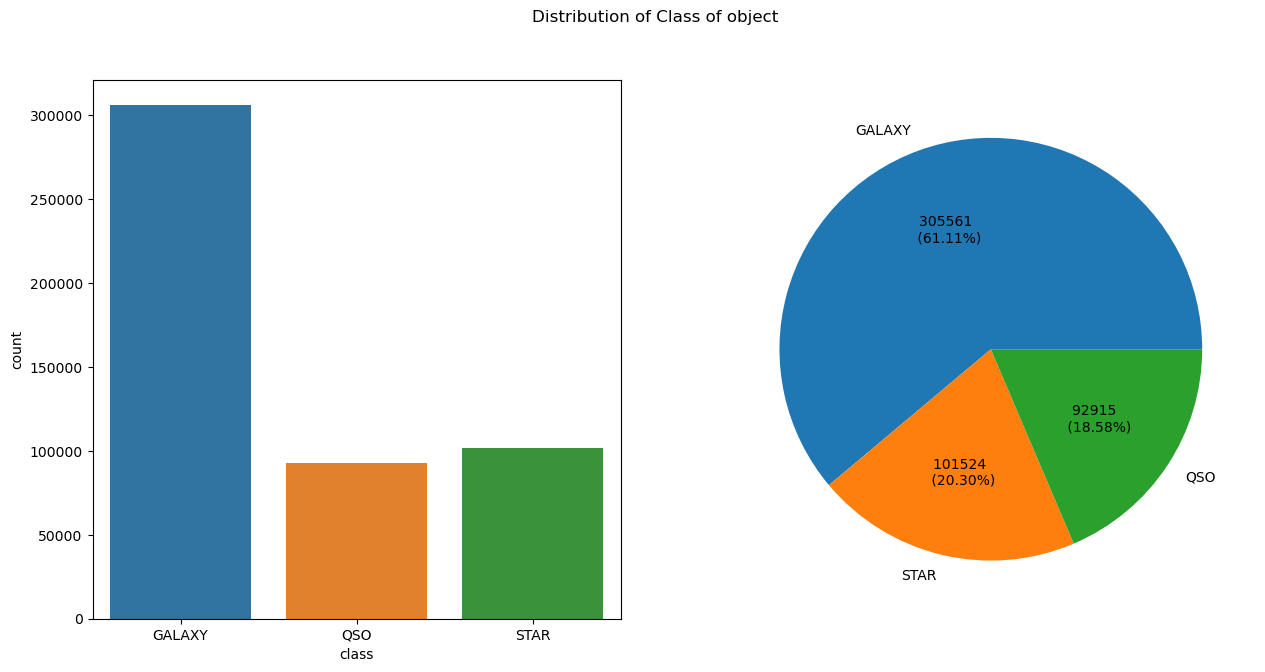

In [15]:
# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# Plot 1: Count plot for the distribution of 'class' column
sns.countplot(data=df, x='class', ax=ax[0])


# Plot 2: Pie chart for the distribution of 'class' column
class_counts = df['class'].value_counts()
class_counts.plot.pie(autopct=lambda p: '{:.0f} \n ({:.2f}%)'.format(p * sum(class_counts) / 100, p),
                      ax=ax[1])
ax[1].set_ylabel('')

plt.suptitle("Distribution of Class of object")
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

<Axes: >

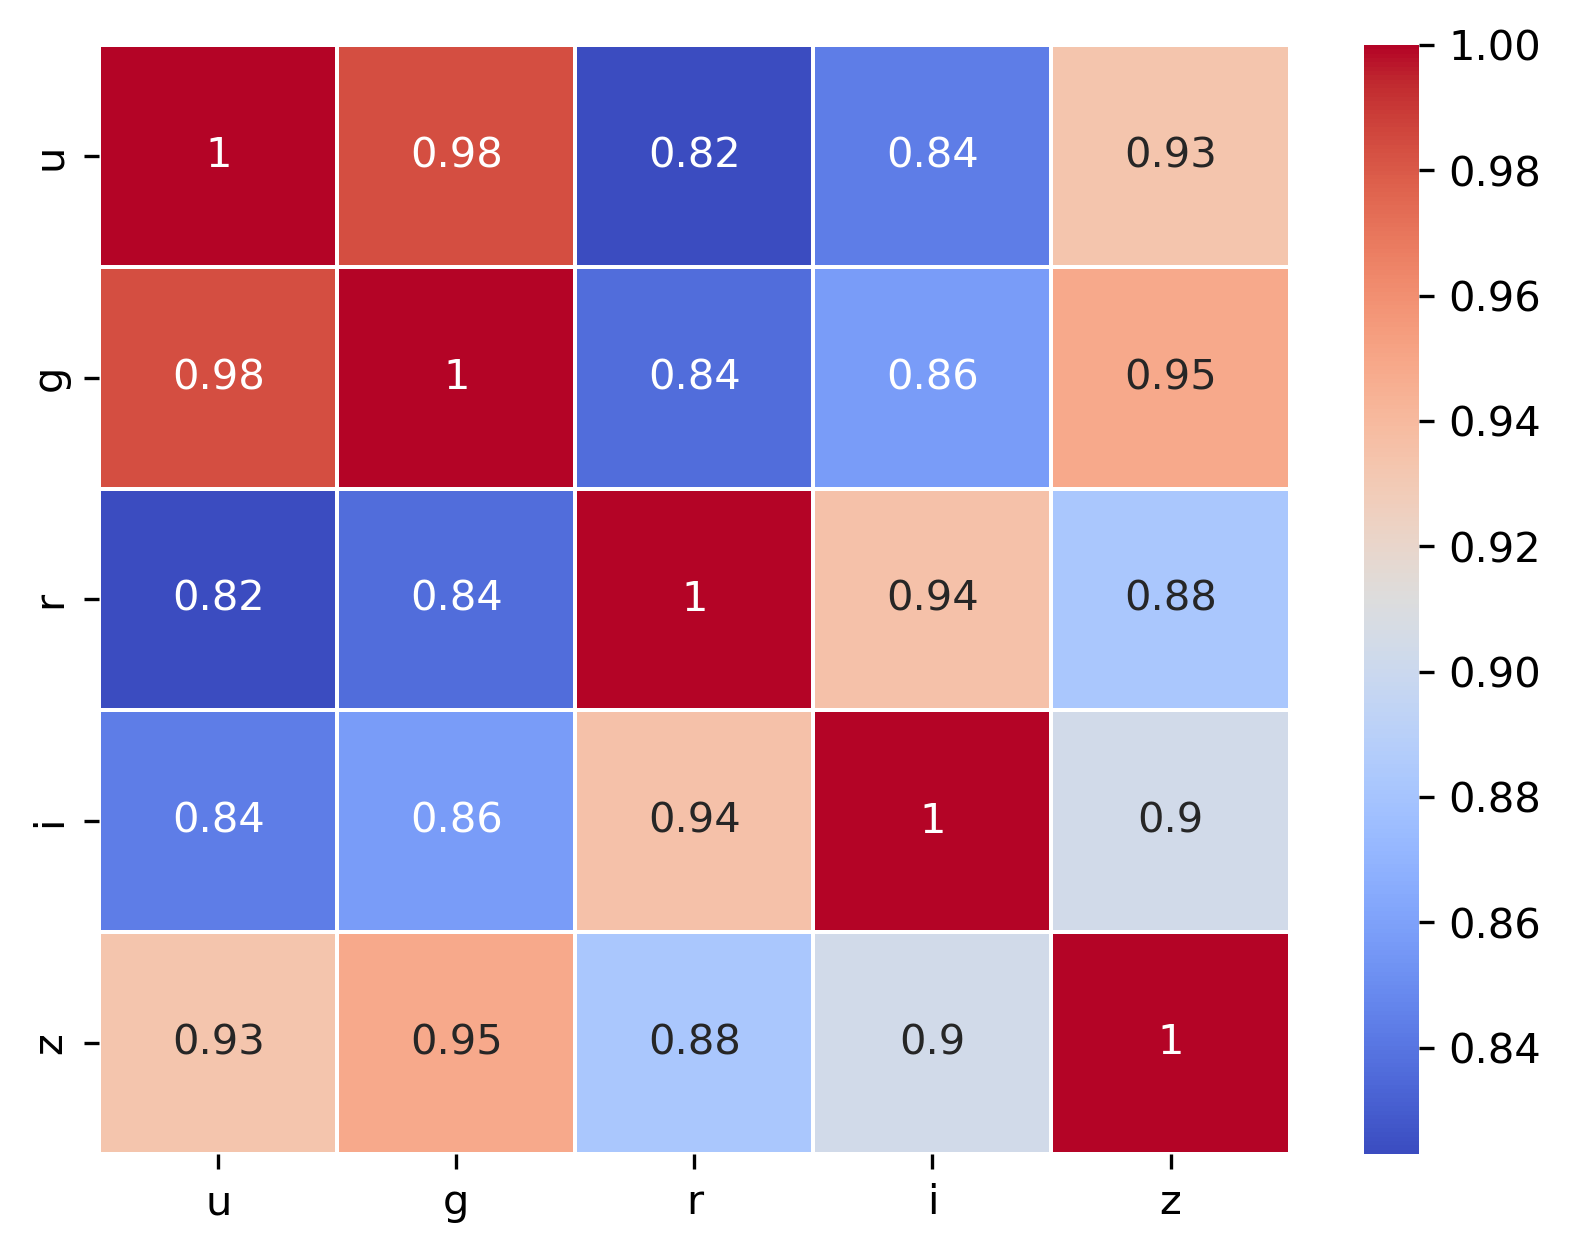

In [17]:
CI = df[['u','g','r','i','z']]
CIcorr = CI.corr()
plt.figure(dpi=300)
sns.heatmap(CIcorr, annot=True, cmap='coolwarm',lw=0.5)


Text(0.5, 0.92, '3D map of astronomical objects observed by SDSS')

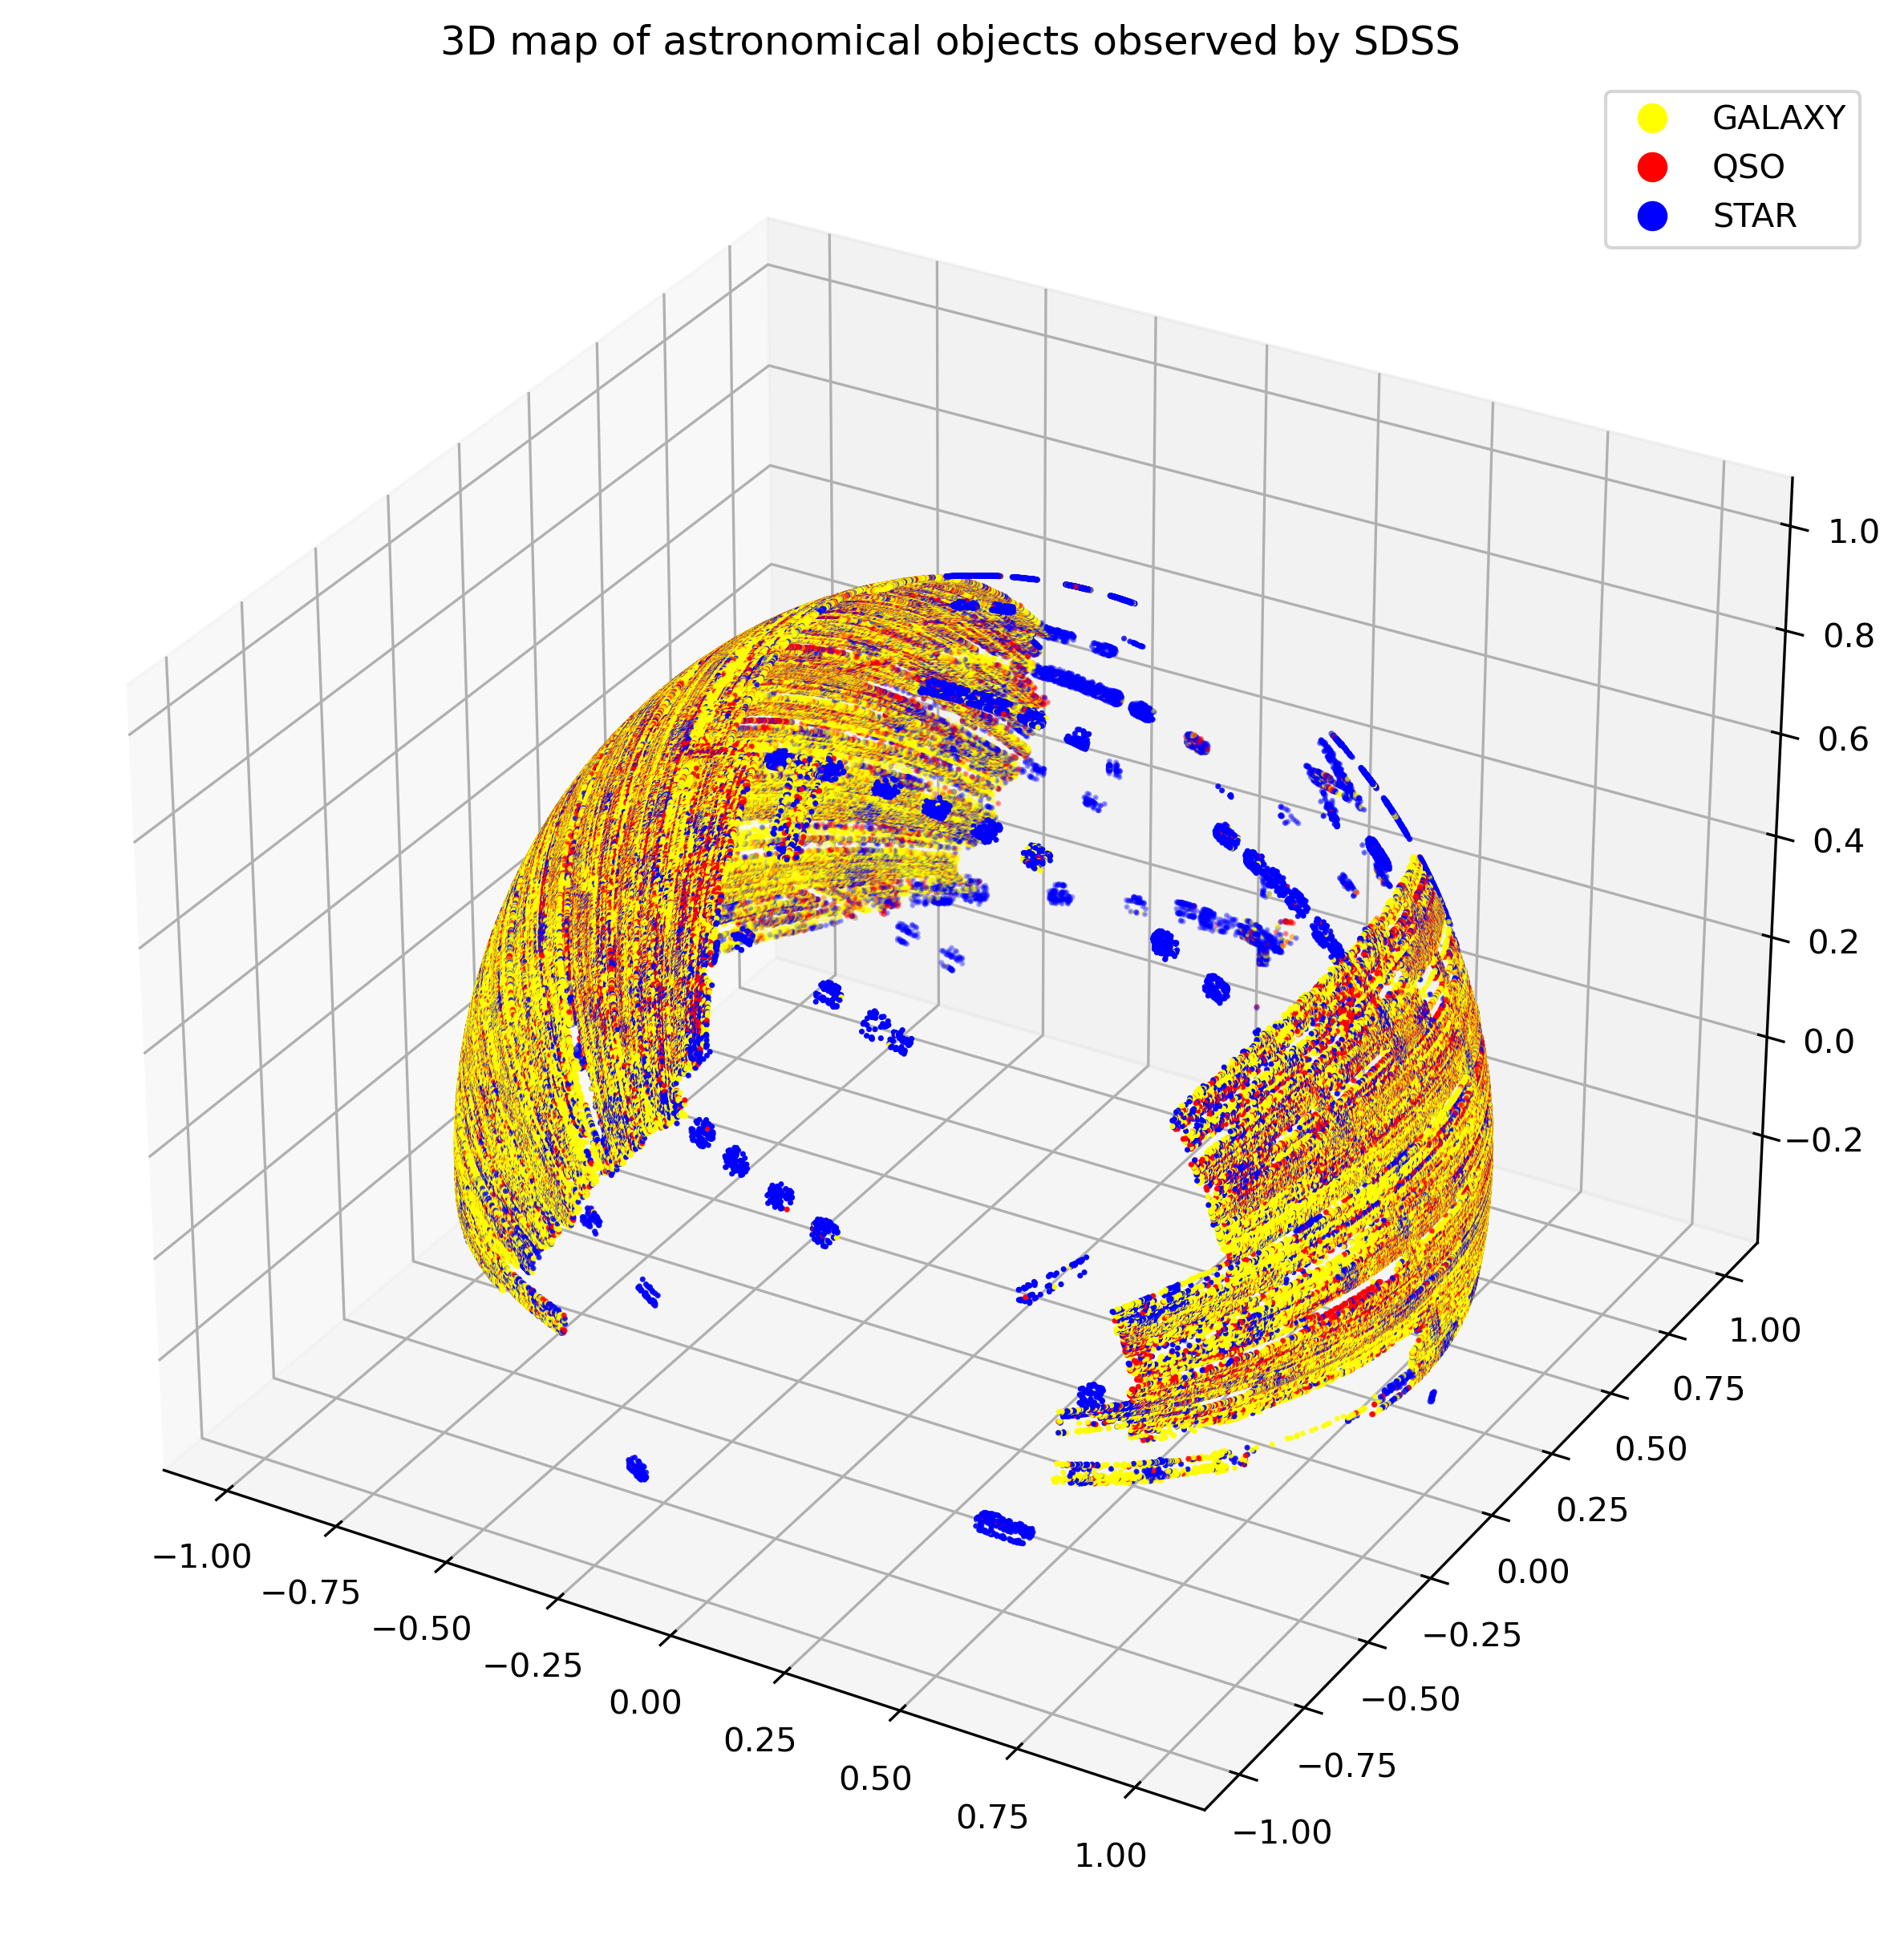

In [18]:
colors = {'GALAXY': 'yellow', 'QSO': 'red', 'STAR': 'blue'}
ra = [i*u.deg for i in df['ra']]
dec = [i*u.deg for i in df['dec']]
coords = SkyCoord(ra=ra, dec=dec)
# Convert the coordinates to Cartesian
x = coords.cartesian.x.value
y = coords.cartesian.y.value
z = coords.cartesian.z.value
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10),dpi=300)  # Adjust the figure size as needed
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=df['class'].map(colors), s=0.5)
# Create legend handles and labels
handles = [plt.Line2D([], [], marker='o', markersize=8, color=color, linestyle='') for color in colors.values()]
labels = list(colors.keys())

# Add legend
ax.legend(handles, labels)
plt.title("3D map of astronomical objects observed by SDSS")

In [19]:
X = df[['u', 'g', 'r', 'i', 'z']]
y = df['class']

In [21]:
# ALL IMPORTS
import os
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV

2023-08-12 00:26:53.685894: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
import sklearnex
sklearnex.patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
random_seed = 42

np.random.seed(random_seed)
random.seed(random_seed)

In [29]:
# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [30]:
def split_data(X, y, train_size=0.6, test_size=0.2, validation_size=0.2, random_state=None):
    # Split data into train+val and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Calculate the percentage for validation data based on the remaining data after test split
    remaining_size = 1.0 - test_size
    val_size = validation_size / remaining_size

    # Split train+val data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size, random_state=random_state)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [31]:
X_train, X_test, X_val, y_train, y_test, y_val = split_data(X, y)

In [32]:
def plot_heatmap(matrix, title, labels):
    sns.heatmap(data=matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)
    
def plot_confusion_matrix(y_true, y_pred, labels, suptitle):
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))
    
    plt.figure(figsize=(15, 3),dpi=300)
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.suptitle(suptitle,x=0.5,y=1.1,size='xx-large')
    plt.show()

def reporter(clf, X, y, title, labels, best=None):
    pred = clf.predict_proba(X=X)
    
    lgloss = log_loss(y_true=y, y_pred=pred)
    lgloss = np.round(a=lgloss, decimals=3)
    
    cm_pred = clf.predict(X=X)
    
    print(title)
    if best is None:
        print("Logloss: {}".format(lgloss))
    else:
        print("Logloss: {}".format(lgloss))
        print("Best parameters: {}".format(best))
    
    plot_confusion_matrix(y_true=y, y_pred=cm_pred, labels=labels, suptitle=title)
    
    print(classification_report(y_true=y, y_pred=cm_pred))
    
    return lgloss

In [33]:
rfc = RandomForestClassifier(random_state=random_seed)

In [34]:
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_valid_pred = rfc.predict(X_val)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
validation_accuracy = accuracy_score(y_val, y_valid_pred)
print("Test set Accuracy:", test_accuracy)
print("Validation set Accuracy:", validation_accuracy)

Test set Accuracy: 0.64827
Validation set Accuracy: 0.64666


Training Set
Logloss: 0.826
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


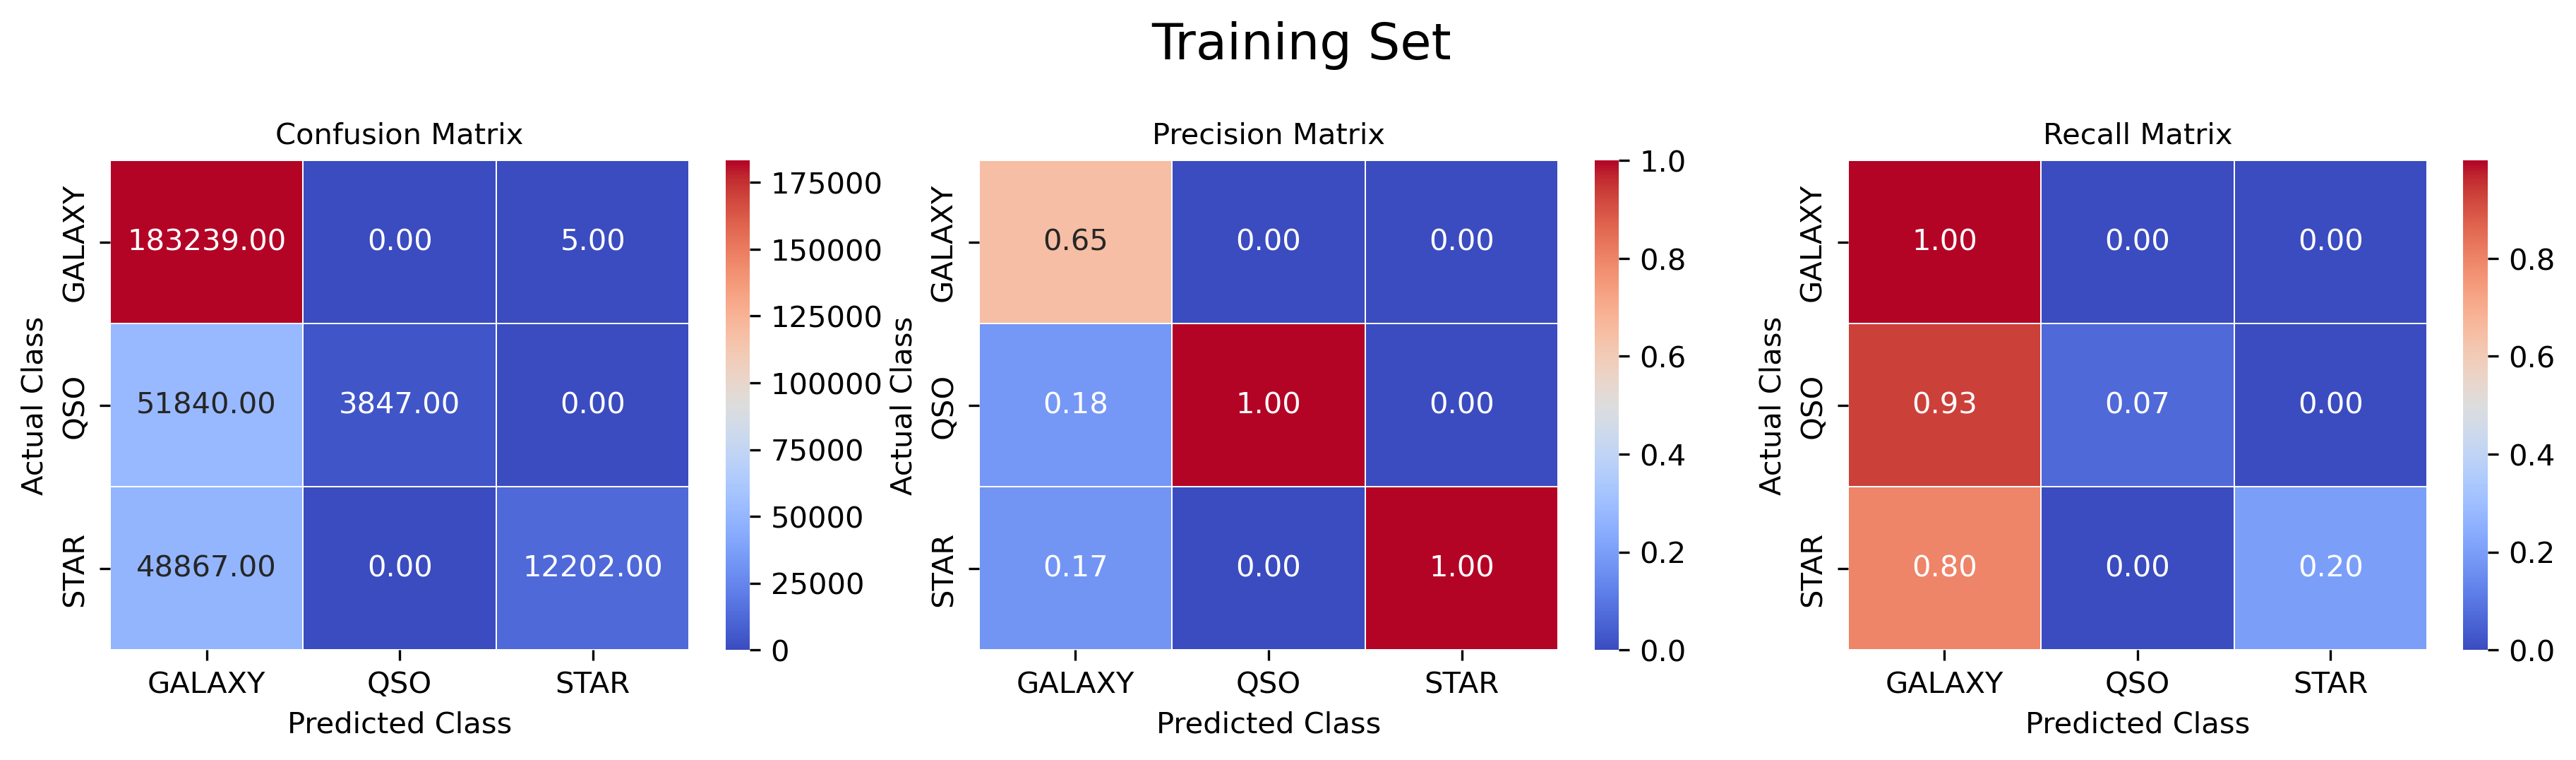

              precision    recall  f1-score   support

      GALAXY       0.65      1.00      0.78    183244
         QSO       1.00      0.07      0.13     55687
        STAR       1.00      0.20      0.33     61069

    accuracy                           0.66    300000
   macro avg       0.88      0.42      0.42    300000
weighted avg       0.78      0.66      0.57    300000

Testing Set
Logloss: 0.862
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


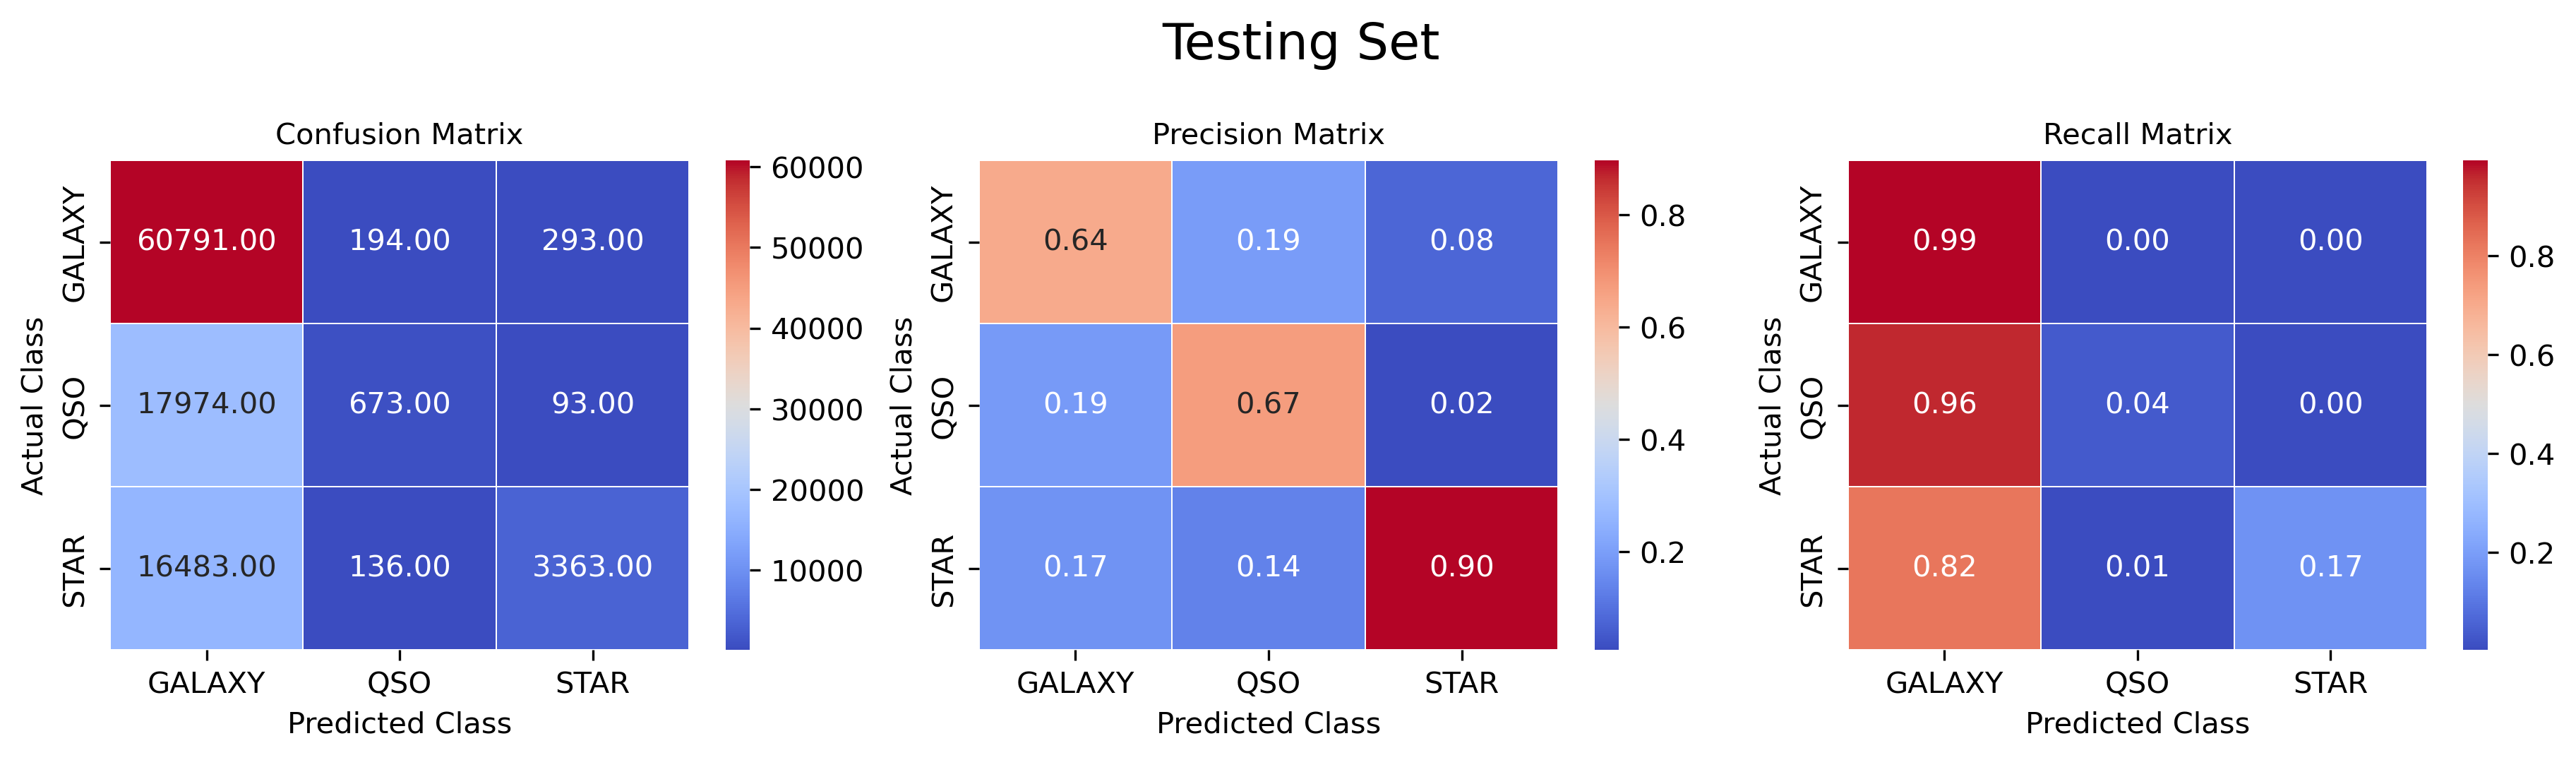

              precision    recall  f1-score   support

      GALAXY       0.64      0.99      0.78     61278
         QSO       0.67      0.04      0.07     18740
        STAR       0.90      0.17      0.28     19982

    accuracy                           0.65    100000
   macro avg       0.74      0.40      0.38    100000
weighted avg       0.70      0.65      0.55    100000

Validation Set
Logloss: 0.865
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


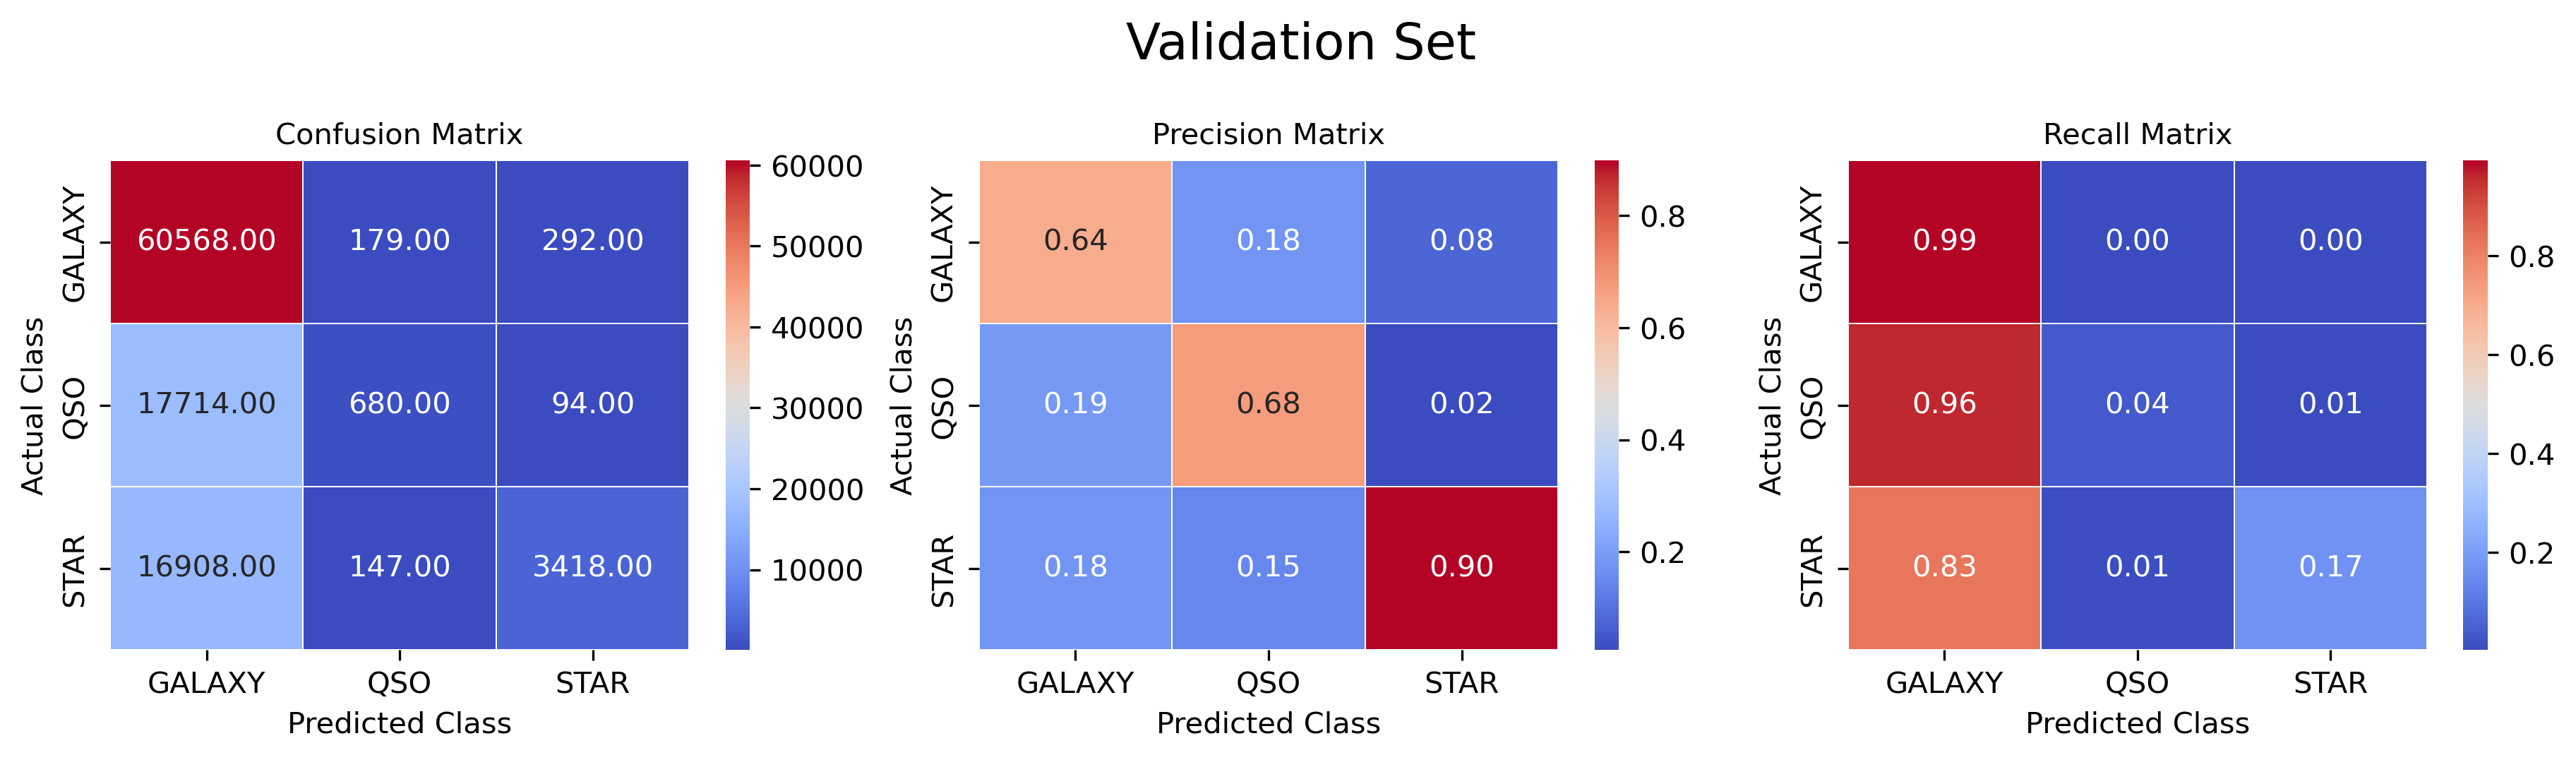

              precision    recall  f1-score   support

      GALAXY       0.64      0.99      0.78     61039
         QSO       0.68      0.04      0.07     18488
        STAR       0.90      0.17      0.28     20473

    accuracy                           0.65    100000
   macro avg       0.74      0.40      0.38    100000
weighted avg       0.70      0.65      0.54    100000



In [35]:
training_loss_rfc = reporter(clf=rfc, X=X_train, y=y_train, title='Training Set', labels=labels)
test_loss_rfc = reporter(clf=rfc, X=X_test, y=y_test, title='Testing Set', labels=labels)
val_loss_rfc = reporter(clf=rfc, X=X_val, y=y_val, title='Validation Set', labels=labels)

In [37]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform',
                                                     random_state=random_seed),
              'n_estimators': Integer(100, 300,random_state=random_seed)}

# Write about why we use StratifiedKFold
# https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_seed)

evolved_estimator = GASearchCV(estimator=rfc,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=5,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.5,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=3)

In [38]:
# TAKES ABOUT 15-20 MINUTES TO RUN
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.612881	0.00413485 	0.621237   	0.610813   
1  	12    	0.614946	0.0050622  	0.621237   	0.610813   
